# 电影推荐系统——Auto Lee

数据收集的快速增长带来了一个新的信息时代。数据被用来创建更有效的系统，这就是推荐系统发挥作用的地方。推荐系统是一种信息过滤系统，它可以提高搜索结果的质量，并提供与搜索项目更相关的项目或与用户的搜索历史相关的项目。

它们被用来预测用户对商品的评级或偏好。几乎每一家大型科技公司都以这样或那样的形式应用了它们:亚马逊(Amazon)用它向客户推荐产品，YouTube用它来决定自动播放的下一个视频，Facebook用它来推荐喜欢的页面和关注的人。此外，Netflix和Spotify等公司的业务和成功高度依赖于其推荐引擎的有效性。

本次实验将从两种典型的推荐模式出发，使用TMDB 5000电影数据集构建一个基础的电影推荐系统。

## 三种经典推荐模式

* 传统协同过滤-Demographic Filtering（人口统计学推荐）
* 基于内容的过滤-Content Based Filtering
* 协同过滤-Collaborative Filtering

## 数据导入

In [1]:
import pandas as pd 
import numpy as np 
df1=pd.read_csv('tmdb_5000_credits.csv')
df2=pd.read_csv('tmdb_5000_movies.csv')

### 第一个数据集包括:
* movie_id - 每部电影的id
* cast - 主角和配角的名字
* crew - 导演、编辑、作曲家、作家等


### 第二个数据集包括：
* budget - 预算
* genre - 电影的类型，动作，喜剧，惊悚等
* homepage - 电影主页的链接
* id - 第一个数据集中的movie_id
* keywords - 与电影相关的关键词或标签
* original_language - 电影母语
* original_title - 在翻译或改编之前的电影名称
* overview - 电影概要
* popularity - 电影受欢迎程度的数值
* production_companies - 制作公司
* production_countries - 所属国家
* release_date - 发布日期
* revenue - 全球收入
* runtime - 放映时间（以分钟为单位）
* status - 已发布/未公映
* tagline - 标语
* title - 电影名
* vote_average - 平均评分
* vote_count - 评论人数

### 对两个表按照movie_id键值进行内连接

In [2]:
df1.columns = ['id','tittle','cast','crew']
df2= df2.merge(df1,on='id')

In [3]:
df2.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,tittle,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond��s past sends him ...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


## 传统协同过滤-Demographic Filtering（人口统计学推荐）

根据电影的受欢迎程度或类型为每个用户提供一般化的推荐。系统向具有相似人口统计特征的用户推荐相同的电影。由于每个用户都是不同的，所以这种方法被认为太简单了。这一系统背后的基本思想是，更受欢迎、更受好评的电影更有可能被普通观众喜欢。


我们需要做如下工作：
* 设定一个指标来给电影打分
* 计算每部电影的得分
* 对评分进行排序，向用户推荐评分最好的电影。

我们可以用电影的平均评分作为评分，但这样做并不公平，因为平均评分8.9、只有3票的电影不能被认为比平均评分7.8、但有40票的电影好。所以将使用IMDB的加权评分(wr)

### wr=(v/(v+m) * R) + (m/(m+v) * C)

其中：
* V是电影的票数
* M是在图表中列出所需的最低票数
* R是电影的平均评分
* C是整个报告的平均票数

In [4]:
C= df2['vote_average'].mean()
C

6.092171559442011

所有电影的平均评分大约是6分(满分10分)。下一步是确定m的合适值，即图表中列出的最小投票数。我们将使用第90百分位作为我们的截止点。换句话说，一部电影要想登上榜单，它的票数必须至少超过榜单上90%的电影。

In [5]:
m= df2['vote_count'].quantile(0.9)
m

1838.4000000000015

In [6]:
q_movies = df2.copy().loc[df2['vote_count'] >= m]
q_movies.shape

(481, 23)

可以看到有481部电影符合这个名单。现在，需要为每一部合格的电影计算指标。为此，这里需要定义一个函数weighted_rating()，并定义一个新的特征评分，我们将通过将该函数应用到合格电影的DataFrame来计算其值:

In [7]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [8]:
# 定义一个新特性'score'并使用' weighted_rating() '计算它的值
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

最后，让我们根据评分特性对DataFrame进行排序，并输出前10部电影的标题、投票计数、投票平均值和加权评分或评分。

In [9]:
#根据上面计算的分数对电影进行排序
q_movies = q_movies.sort_values('score', ascending=False)

#排名前15的电影
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(15)

,title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


我们已经制作了第一个(虽然非常基本)推荐器。在Trending Now选项卡下，我们可以找到非常流行的电影，它们可以通过按popularity列对数据集进行排序来获得。

Text(0.5, 1.0, 'Popular Movies')

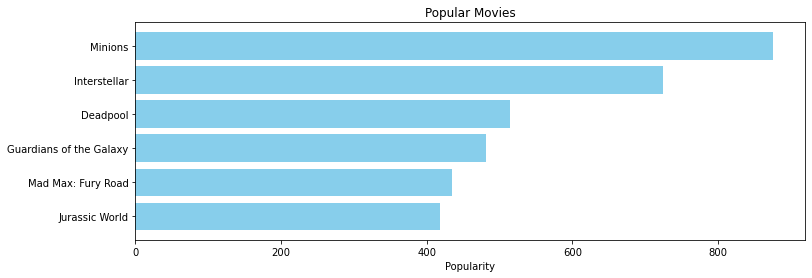

In [10]:
pop= df2.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6),pop['popularity'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

传统协同过滤为所有用户提供了一个推荐电影的总体图表。但这个推荐系统对特定用户的兴趣和品味并不敏感。这时我们就转向一个更精细的系统——Content Based Filtering。

## 基于内容的过滤-Content Based Filtering

根据一个特定的项目推荐相似的项目。该系统使用项目元数据，如电影的类型，导演，描述，演员等，来做出这些推荐。这些推荐系统背后的基本思想是:如果一个人喜欢某件商品，他(她)也会喜欢与之相似的商品。在这个推荐系统中，电影的内容(概述，演员，工作人员，关键词，标语等)被用来寻找它与其他电影的相似性。然后推荐那些最有可能相似的电影。

### A.基于电影情节描述的推荐

本节将根据所有电影的情节描述计算成对的相似度分数，并根据相似度分数推荐电影。电影情节概要已在数据集中给出。让我们看一下数据

In [11]:
df2['overview'].head(5)

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond��s past sends him ...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

学过文本处理的同学，应该知道我们需要转换每句情节描述的词向量。这里我们选择将句子转化为TF-IDF向量。

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

#删除所有英语停顿词，如'the'， 'a'
tfidf = TfidfVectorizer(stop_words='english')

#将NaN替换为空字符串
df2['overview'] = df2['overview'].fillna('')

#通过拟合和变换数据，构造所需的TF-IDF矩阵
tfidf_matrix = tfidf.fit_transform(df2['overview'])

#查看tfidf_matrix的形状
tfidf_matrix.shape

(4803, 20967)

我们发现，超过20,000个不同的单词被用来描述数据集中的4800部电影。

有了这个矩阵，现在可以计算相似度分数。这里将使用余弦相似度来计算一个表示两部电影之间相似度的数值。

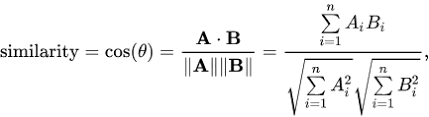

In [13]:
from sklearn.metrics.pairwise import linear_kernel

# 计算余弦相似度矩阵
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

这里定义一个函数，它接受电影标题作为输入，并输出10部最相似的电影的列表。函数定义步骤如下：
* 根据电影的标题获取电影的索引
* 获取特定电影与所有电影的余弦相似度分数列表。将它转换为一个元组列表，其中第一个元素是它的位置，第二个元素是相似度分数
* 根据相似度评分对上述元组列表进行排序;也就是第二个元素
* 获取列表中的前10个元素。因为第一个元素是电影本身所以需要忽略

In [14]:
#构建一个索引和电影名称的反向映射
indices = pd.Series(df2.index, index=df2['title']).drop_duplicates()

In [15]:
#函数以电影标题作为输入并输出最相似的电影
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]
    
    # 获取所有电影与该电影的配对相似度分数
    sim_scores = list(enumerate(cosine_sim[idx]))

    # 根据相似度评分对电影进行排序
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # 获取最相似的10部电影
    sim_scores = sim_scores[1:11]

    # 获取电影索引
    movie_indices = [i[0] for i in sim_scores]

    # 返回最相似的前10部电影
    return df2['title'].iloc[movie_indices]

In [16]:
get_recommendations('The Dark Knight Rises')

65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
9            Batman v Superman: Dawn of Justice
1181                                        JFK
210                              Batman & Robin
Name: title, dtype: object

In [17]:
get_recommendations('The Avengers')

7               Avengers: Age of Ultron
3144                            Plastic
1715                            Timecop
4124                 This Thing of Ours
3311              Thank You for Smoking
3033                      The Corruptor
588     Wall Street: Money Never Sleeps
2136         Team America: World Police
1468                       The Fountain
1286                        Snowpiercer
Name: title, dtype: object

虽然这个系统在寻找剧情描述相似的电影方面做得不错，但推荐的质量并不好。《黑暗骑士崛起》退回了所有蝙蝠侠电影，而喜欢这部电影的人更有可能喜欢克里斯托弗·诺兰的其他电影。这是目前的系统无法捕捉到的。

### B.基于电影演员、类型和关键词为基础的推荐

推荐器的质量将随着更好更多的元数据的使用而提高。本节我们将基于以下元数据建立一个推荐:3位最受欢迎的演员，导演，相关类型和电影情节关键词。
从演员，工作人员和关键词特征中，我们需要提取三个最重要的演员，导演和与该电影相关的关键词。现在，我们的数据是以“字符串化”列表的形式呈现的，我们需要将其转换为规范化的结构

In [18]:
from ast import literal_eval
#将字符串化的特性解析为相应的python对象
features = ['cast', 'crew', 'keywords', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(literal_eval)

In [19]:
#从剧组特写里找到导演的名字。如果没有列出director，则返回NaN
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [20]:
#获取电影的前三个主演
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        #检查是否存在3个以上的元素。如果是，只返回前三个。如果没有，返回整个列表。
        if len(names) > 3:
            names = names[:3]
        return names

    #返回空列表，以防畸形数据
    return []

In [21]:
#确定新的导演，演员，类型和关键字，以合适的形式特征。
df2['director'] = df2['crew'].apply(get_director)

features = ['cast', 'keywords', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(get_list)

In [22]:
df2[['title', 'cast', 'director', 'keywords', 'genres']].head(3)

,title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"


下一步是将名称和关键字实例转换为小写，并去掉它们之间的所有空格。这样做是为了使我们的矢量器不把"Johnny Depp"和"Johnny Galecki" 中的“Johnny”算作同一个人。

In [23]:
#函数将所有字符串转换为小写并去掉空格名称
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [24]:
features = ['cast', 'keywords', 'director', 'genres']

for feature in features:
    df2[feature] = df2[feature].apply(clean_data)

In [25]:
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])
df2['soup'] = df2.apply(create_soup, axis=1)

接下来的步骤与我们在基于情节描述的推荐中所做的相同。一个重要的区别是我们使用CountVectorizer()而不是TF-IDF。因为如果某个演员/导演出演或导演的电影相对较多，那么要提高这些人的推荐指数。

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df2['soup'])

In [27]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [28]:
df2 = df2.reset_index()
indices = pd.Series(df2.index, index=df2['title'])

In [29]:
get_recommendations('The Dark Knight Rises', cosine_sim2)

65               The Dark Knight
119                Batman Begins
4638    Amidst the Devil's Wings
1196                The Prestige
3073           Romeo Is Bleeding
3326              Black November
1503                      Takers
1986                      Faster
303                     Catwoman
747               Gangster Squad
Name: title, dtype: object

In [30]:
get_recommendations('The Godfather', cosine_sim2)

867      The Godfather: Part III
2731      The Godfather: Part II
4638    Amidst the Devil's Wings
2649           The Son of No One
1525              Apocalypse Now
1018             The Cotton Club
1170     The Talented Mr. Ripley
1209               The Rainmaker
1394               Donnie Brasco
1850                    Scarface
Name: title, dtype: object

我们看到，由于更多的元数据，我们的推荐器成功地捕获了更多的信息，并给了我们更好的推荐。漫威或DC漫画的粉丝更有可能喜欢同一制作公司的电影，对此我们也可以在上面的特性中添加production_company。